# Keras Introdution

In [31]:
# Todas as bibliotecas que serão utilizadas

import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from tensorflow.keras.models import load_model
from tensorflow import keras

In [32]:
# Biblioteca que será utilizada 

dataset = keras.datasets.fashion_mnist
((train_x, train_y), (test_x, test_y)) = dataset.load_data()

# Normalizando  os dados 

train_x = train_x/float(250)

# Lista não númerica igualmente indexada dos classificadores do Dataset

y_list_dataset = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

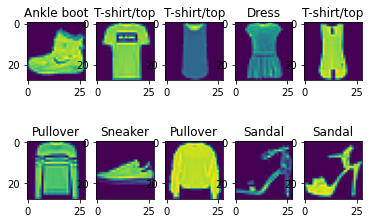

In [33]:
# Visualizando os dados do nosso dataset

for c in range(10):

    plt.subplot(2, 5, c+1)
    plt.imshow(train_x[c])
    plt.title(y_list_dataset[train_y[c]])

In [34]:
# Definindo, compilando, treinando, testando e medindo nosso modelo

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= tf.nn.softmax)
    ])

adam = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False, name = "Adam")

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss'), keras.callbacks.ModelCheckpoint(filepath = 'best_model.hdf5', 
                                                                monitor = 'val_loss', save_best_only = True)]

model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

history = model.fit(train_x, train_y, epochs= 10, validation_split = 0.2, batch_size = 500, callbacks = callbacks)

model.predict(test_x)

Epoch 1/10
96/96 [==============================] - 1s 8ms/step - loss: 0.8072 - accuracy: 0.7217 - val_loss: 0.5270 - val_accuracy: 0.8256
Epoch 2/10
96/96 [==============================] - 0s 5ms/step - loss: 0.5172 - accuracy: 0.8226 - val_loss: 0.4535 - val_accuracy: 0.8455


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [35]:
# Gráfico de accuracy do modelo 

fig = go.Figure()
fig.add_trace(go.Scatter(x = history.epoch, y = history.history['accuracy'], name = 'Train'))
fig.add_trace(go.Scatter(x = history.epoch, y = history.history['val_accuracy'], name = 'Validation'))
fig.update_layout(dict(
    title = 'Accuraccy by epoch',
    xaxis_title = 'Epoch',
    yaxis_title = 'Accuracy'
    )) 
fig.show()

In [36]:
# Gráfico de loss do modelo 

fig = go.Figure()
fig.add_trace(go.Scatter(x =  history.epoch, y = history.history['loss'], name = 'Train'))
fig.add_trace(go.Scatter(x = history.epoch, y = history.history['val_loss'], name = 'Validation'))

fig.update_layout(dict(
    title = 'Loss by epoch',
    xaxis_title = 'Epoch',
    yaxis_title = 'Loss'
))
fig.show()

In [37]:
# Verificando o Sumário do nosso modelo 

model_summary = model.summary()

# Obtendo os pesos do nosso modelo 

model_layers_dense01_weights = model.layers[1].get_weights()[0]

# Obtendo os vieses do nosso modelo

model_layers_dense01_bias = model.layers[1].get_weights()[1]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Carregando nosso melhor modelo 

saved_model = load_model('best_model.hdf5')

# Predicting with Keras

In [ ]:
# Importando todas as bibliotecas que serão utilizadas

import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
import plotly.express as px

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Random State

SEED = 52
np.random.seed = SEED

# Cursor

scaler = StandardScaler()

In [ ]:
# Importando o database que será utilizado as db

db_raw = pd.read_csv('G:\Meu Drive\My Repositories\datasets_for_data_science\databases\datasets\\airline_passangers.csv')
db_normalized = pd.read_csv('G:\Meu Drive\My Repositories\datasets_for_data_science\databases\datasets\\airline_passangers.csv')

In [ ]:
# Normalizando os dados do nosso dataset

scaler.fit(db_raw.values)
db_normalized[['tempo', 'passageiros']] = scaler.transform(db_raw)

# Separando dados de treino e teste

db_x = db_normalized['tempo']
db_y = db_normalized['passageiros']

train_x, test_x, train_y, test_y = train_test_split(db_x, db_y, test_size= 0.2)

train_df = pd.DataFrame(columns = db_raw.columns, data = list(zip(train_x, train_y)))
test_df = pd.DataFrame(columns = db_raw.columns, data = list(zip(test_x, test_y)))
train_df = pd.DataFrame(columns = db_raw.columns, data = scaler.inverse_transform(train_df))
test_df = pd.DataFrame(columns = db_raw.columns, data = scaler.inverse_transform(test_df))

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

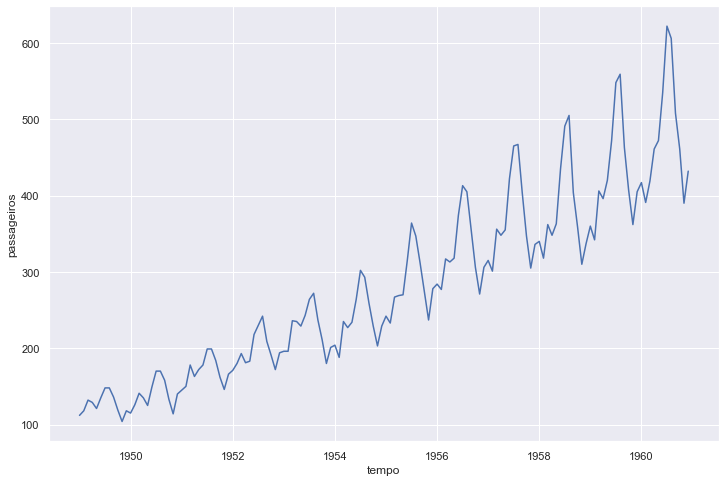

In [ ]:
# Visualizando o gráfico do database

sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = db_raw['tempo'], y = db_raw['passageiros'], label = '')

#px.line(x = db_raw['tempo'], y = db_raw['passageiros'])

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

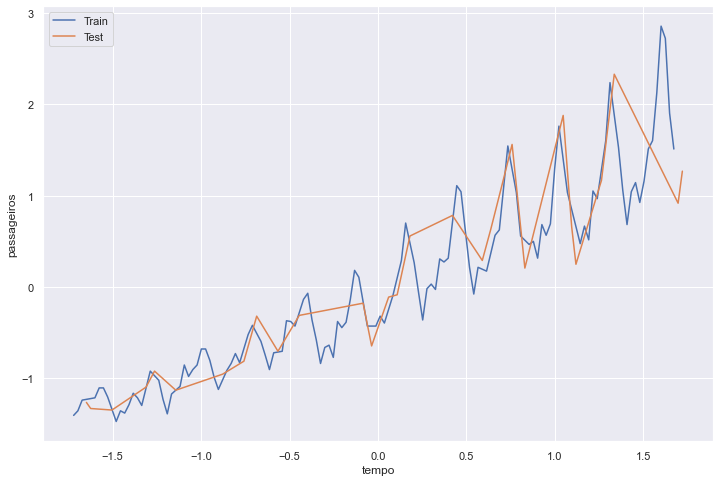

In [ ]:
# Visualizando o gráfico de treino e teste do modelo

sns.set(rc = {'figure.figsize': (12, 8)})
#sns.lineplot(x = db_normalized['tempo'], y = db_normalized['passageiros'], label = 'Full')
sns.lineplot(x = train_x, y = train_y, label = 'Train')
sns.lineplot(x = test_x, y = test_y, label = 'Test')

In [ ]:
# Definindo, compilando, treinando, testando e medindo nosso modelo linear

model_regressor_01 = keras.Sequential([
    keras.layers.Dense(1, input_dim = 1, kernel_initializer = 'Ones', activation = 'linear', use_bias = False)
])

model_regressor_01.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_01 = model_regressor_01.fit(train_x, train_y, epochs = 10)

predict_01 = model_regressor_01.predict(test_x)

Epoch 1/10
4/4 [==============================] - 0s 997us/step - loss: 0.1371
Epoch 2/10
4/4 [==============================] - 0s 989us/step - loss: 0.1368
Epoch 3/10
4/4 [==============================] - 0s 997us/step - loss: 0.1365
Epoch 4/10
4/4 [==============================] - 0s 998us/step - loss: 0.1362
Epoch 5/10
4/4 [==============================] - 0s 997us/step - loss: 0.1358
Epoch 6/10
4/4 [==============================] - 0s 665us/step - loss: 0.1356
Epoch 7/10
4/4 [==============================] - 0s 997us/step - loss: 0.1352
Epoch 8/10
4/4 [==============================] - 0s 997us/step - loss: 0.1350
Epoch 9/10
4/4 [==============================] - 0s 665us/step - loss: 0.1348
Epoch 10/10
4/4 [==============================] - 0s 997us/step - loss: 0.1345


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

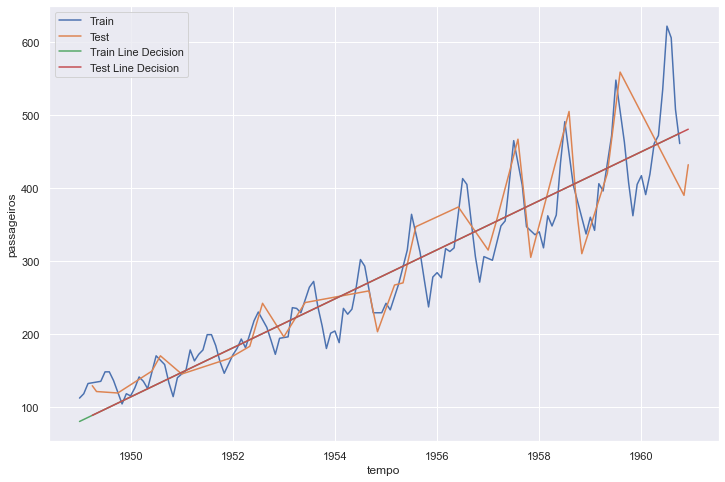

In [ ]:
# Printando a linha de decisão do treino e teste do modelo regressor 1

fit_line_decision = model_regressor_01.predict(train_x)[:,0]

fit_line_decision_df_normalized = pd.DataFrame(columns = ['tempo', 'passageiros'], data = list(zip(train_x, fit_line_decision)))
fit_line_decision_df = pd.DataFrame(columns=['tempo', 'passageiros'], data = scaler.inverse_transform(fit_line_decision_df_normalized))

predict_line_decision = predict_01[:,0]
predict_line_decision_df_normalized = pd.DataFrame(columns = db_raw.columns, data = list(zip(test_x, predict_line_decision)))
predict_line_decision_df = pd.DataFrame(columns = db_raw.columns, data = scaler.inverse_transform(predict_line_decision_df_normalized))

sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'tempo', y = 'passageiros', data = train_df, label = 'Train')
sns.lineplot(x = 'tempo', y = 'passageiros', data = test_df, label = 'Test')
sns.lineplot(x = 'tempo', y = 'passageiros', data = fit_line_decision_df, label = 'Train Line Decision')
sns.lineplot(x = 'tempo', y = 'passageiros', data = predict_line_decision_df, label = 'Test Line Decision')

In [ ]:
# Definindo, compilando, treinando, testando e medindo nosso modelo regressor 2

model_regressor_02 = keras.Sequential([
    keras.layers.Dense(8, input_dim = 1, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False),
    keras.layers.Dense(8, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False),
    keras.layers.Dense(1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False)
])

model_regressor_02.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_02 = model_regressor_02.fit(train_x, train_y, epochs = 1000)

predict_02 = model_regressor_02.predict(test_x)

Epoch 1/1000
4/4 [==============================] - 0s 998us/step - loss: 0.9925
Epoch 2/1000
4/4 [==============================] - 0s 984us/step - loss: 0.9922
Epoch 3/1000
4/4 [==============================] - 0s 997us/step - loss: 0.9923
Epoch 4/1000
4/4 [==============================] - 0s 998us/step - loss: 0.9921
Epoch 5/1000
4/4 [==============================] - 0s 998us/step - loss: 0.9924
Epoch 6/1000
4/4 [==============================] - 0s 989us/step - loss: 0.9921
Epoch 7/1000
4/4 [==============================] - 0s 989us/step - loss: 0.9921
Epoch 8/1000
4/4 [==============================] - 0s 998us/step - loss: 0.9921
Epoch 9/1000
4/4 [==============================] - 0s 989us/step - loss: 0.9922
Epoch 10/1000
4/4 [==============================] - 0s 988us/step - loss: 0.9921
Epoch 11/1000
4/4 [==============================] - 0s 665us/step - loss: 0.9921
Epoch 12/1000
4/4 [==============================] - 0s 988us/step - loss: 0.9920
Epoch 13/1000
4/4 [======

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

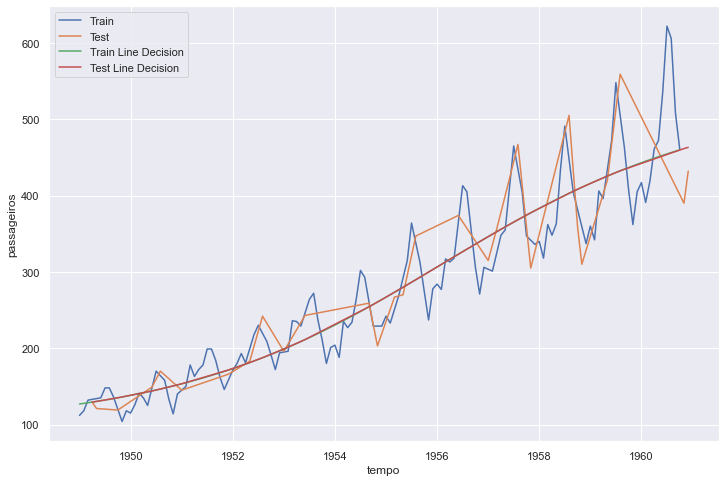

In [ ]:
# Printando a linha de decisão do treino e teste do modelo regressor 2

fit_line_decision_02 = model_regressor_02.predict(train_x)[:,0]

fit_line_decision_df_normalized_02 = pd.DataFrame(columns = ['tempo', 'passageiros'], data = list(zip(train_x, fit_line_decision_02)))
fit_line_decision_df_02 = pd.DataFrame(columns=['tempo', 'passageiros'], data = scaler.inverse_transform(fit_line_decision_df_normalized_02))

predict_line_decision_02 = predict_02[:,0]
predict_line_decision_df_normalized_02 = pd.DataFrame(columns = db_raw.columns, data = list(zip(test_x, predict_line_decision_02)))
predict_line_decision_df_02 = pd.DataFrame(columns = db_raw.columns, data = scaler.inverse_transform(predict_line_decision_df_normalized_02))

sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'tempo', y = 'passageiros', data = train_df, label = 'Train')
sns.lineplot(x = 'tempo', y = 'passageiros', data = test_df, label = 'Test')
sns.lineplot(x = 'tempo', y = 'passageiros', data = fit_line_decision_df_02, label = 'Train Line Decision')
sns.lineplot(x = 'tempo', y = 'passageiros', data = predict_line_decision_df_02, label = 'Test Line Decision')

In [ ]:
# Criando um novo método de entrada e saída para o nosso modelo regressor 3

# Normalizando os dados do nosso dataset

db_raw_y = db_raw['passageiros']
db_raw_y.drop([143], axis=0, inplace=True)

db_just_y = pd.DataFrame(columns= ['yx', 'yy'], data = list(zip(db_raw_y[:71], db_raw_y[71:] )))
scaler.fit_transform(db_just_y.values)

# Separando dados de treino e teste

db_x = db_just_y['yx']
db_y = db_just_y['yy']

train_x_01, test_x_01, train_y_01, test_y_01 = train_test_split(db_y, db_y, test_size= 0.2)

train_df_01 = pd.DataFrame(columns = ['yx', 'yy'], data = list(zip(train_x_01, train_y_01)))
test_df_01 = pd.DataFrame(columns = ['yx', 'yy'], data = list(zip(test_x_01, test_y_01)))

In [ ]:
# Definindo, compilando, treinando, testando e medindo nosso modelo regressor 2

model_regressor_03 = keras.Sequential([
    keras.layers.Dense(8, input_dim = 1, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False),
    keras.layers.Dense(64, kernel_initializer = 'random_uniform', activation = 'sigmoid', use_bias = False),
    keras.layers.Dense(8, kernel_initializer = 'random_uniform', activation = 'linear', use_bias = False)
])

model_regressor_03.compile(optimizer = 'adam', loss = 'mean_squared_error')

history_03 = model_regressor_03.fit(train_x_01, train_y_01, epochs = 1000)

predict_03 = model_regressor_03.predict(test_x_01)

Epoch 1/1000
2/2 [==============================] - 0s 2ms/step - loss: 150674.5938
Epoch 2/1000
2/2 [==============================] - 0s 997us/step - loss: 150612.3906
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 150547.2188
Epoch 4/1000
2/2 [==============================] - 0s 998us/step - loss: 150481.1562
Epoch 5/1000
2/2 [==============================] - 0s 2ms/step - loss: 150413.6094
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 150343.3281
Epoch 7/1000
2/2 [==============================] - 0s 1ms/step - loss: 150268.6562
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 150191.7031
Epoch 9/1000
2/2 [==============================] - 0s 2ms/step - loss: 150111.0312
Epoch 10/1000
2/2 [==============================] - 0s 1ms/step - loss: 150026.6562
Epoch 11/1000
2/2 [==============================] - 0s 997us/step - loss: 149937.5781
Epoch 12/1000
2/2 [==============================] - 0s 2ms/step - l

<AxesSubplot:xlabel='yx', ylabel='yy'>

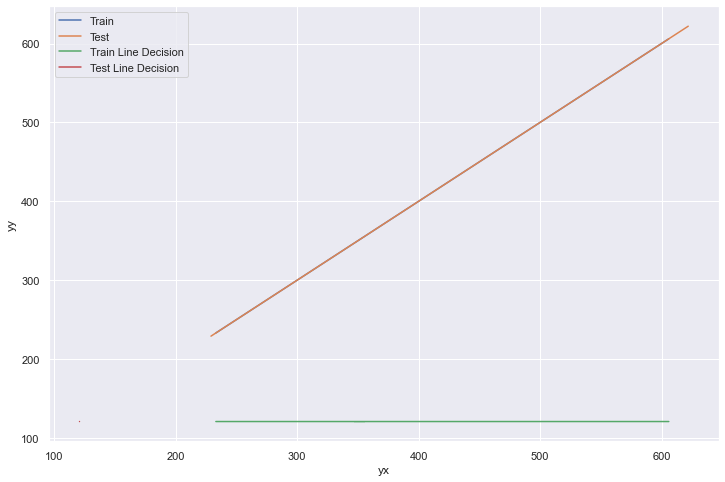

In [ ]:
# Printando a linha de decisão do treino e teste do modelo regressor 3

fit_line_decision = model_regressor_03.predict(train_x_01)[:,0]
fit_line_decision_df = pd.DataFrame(columns = ['yx', 'yy'], data = list(zip(train_x_01, fit_line_decision)))

predict_line_decision = predict_03[:,0]
predict_line_decision_df = pd.DataFrame(columns = ['yx', 'yy'], data = list(zip(test_x_01, predict_line_decision)))

sns.set(rc = {'figure.figsize': (12, 8)})
sns.lineplot(x = 'yx', y = 'yy', data = train_df_01, label = 'Train')
sns.lineplot(x = 'yx', y = 'yy', data = test_df_01, label = 'Test')
sns.lineplot(x = 'yx', y = 'yy', data = fit_line_decision_df, label = 'Train Line Decision')
sns.lineplot(x = 'yy', y = 'yy', data = predict_line_decision_df, label = 'Test Line Decision')

# Recurrent Networks (Error)

In [ ]:
# Importando todas as bibliotecas que serão utilizadas

import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Random State

SEED = 52
np.random.seed = SEED

# Cursor

scaler = StandardScaler()

In [ ]:
# Importando o dataset que será utilizado as df_raw

df_raw = pd.read_csv('G:\Meu Drive\My Repositories\datasets_for_data_science\databases\datasets\\bikes.csv')

In [ ]:
# Alterando os dados do nosso dataset para melhorar modelo 

df_raw['datas'] = pd.to_datetime(df_raw['datas'])

# Separando dados de treino e teste do daset

x = df_raw['datas']
y = df_raw['contagem']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

train_x = train_x.values.reshape(1, -1)
test_x = test_x.values.reshape(1, -1)

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

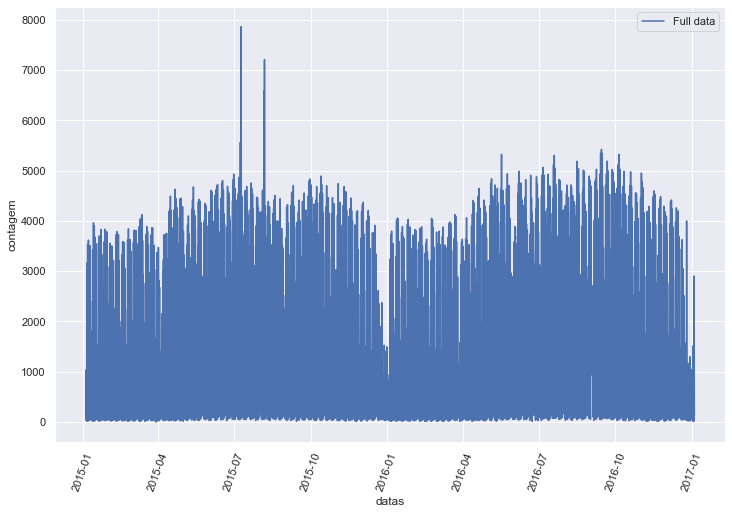

In [ ]:
# Visualizando o gráfico do dataset

sns.set( rc = {'figure.figsize': (12,8)})
sns.lineplot(x = 'datas', y = 'contagem', data = df_raw, label = 'Full data')
plt.xticks(rotation = 70)

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

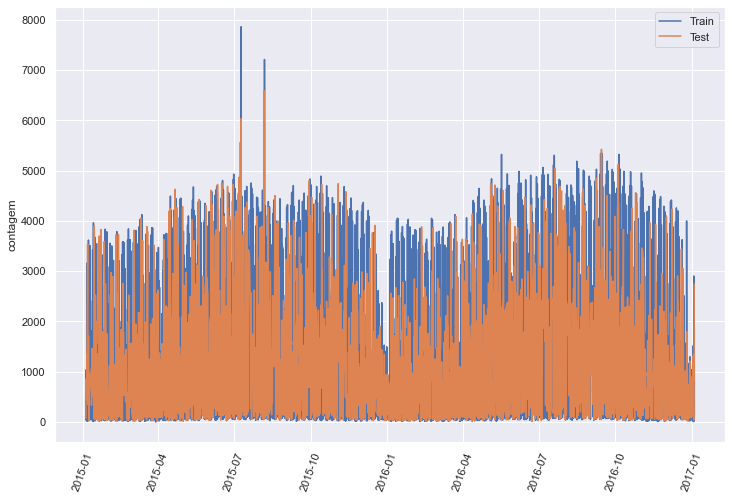

In [ ]:
# Visualizando o gráfico de treino e teste do dataset

sns.set( rc = {'figure.figsize': (12,8)})
sns.lineplot(x = train_x[0,:], y = train_y, label = 'Train')
sns.lineplot(x = test_x[0,:], y = test_y, label = 'Test')
plt.xticks(rotation = 70)

In [ ]:
# Definindo, compilando, treinando, testando e medindo nosso modelo linear

model_recurrent_01 = keras.Sequential([
    keras.layers.LSTM(128, input_shape = (train_x.shape[0], train_x.shape[1], )),
    keras.layers.Dense(units = 1)
])

model_recurrent_01.compile(optimizer = 'RMSProp', loss = 'mean_squared_error')

history_01 = model_recurrent_01.fit(train_x, train_y)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported numpy type: NPY_DATETIME).

In [ ]:
train_x = np.asarray(train_x).astype(np.datetime64)

In [ ]:
train_x.shape

(13931,)

In [ ]:
train_x[0,:]

array(['1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001', ...,
       '1970-01-01T00:00:00.000000001', '1970-01-01T00:00:00.000000001',
       '1970-01-01T00:00:00.000000001'], dtype='datetime64[ns]')

# NLP Sentiment Analysis

In [ ]:
# Bibliotecas que serão utilizadas

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import unidecode

from wordcloud import WordCloud

from nltk import tokenize
from nltk import RSLPStemmer

from string import punctuation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Cursores

SEED = 59
np.random.seed = SEED

# Modelos

LogisticRegression = LogisticRegression()
Vectorizer = CountVectorizer(lowercase = False, max_features = 50)
WordCloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False)
Stemmer = RSLPStemmer()
Tfidf = TfidfVectorizer(lowercase = True, ngram_range = (1,2))

# Extra

In [ ]:
# Dataset que será utilizado 

df_raw = pd.read_csv('G:\Meu Drive\My Repositories\datasets_for_data_science\databases\datasets\\Imdb-en-ptbr.csv')

In [ ]:
# Alterando nossa biblioteca para uso apropriado 

df = df_raw.drop(columns = ['id', 'text_en'])

altera_sentiment = {'neg': 0, 'pos': 1}
df['sentiment'] = df.sentiment.map(altera_sentiment)

# Separando X e Y do nosso dataset 

x = df.text_pt
y = df.sentiment

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, stratify = y)

In [ ]:
# Criando um novo X capaz do nosso modelo interpretar

x = Vectorizer.fit_transform(x)
sparsed_matrix = pd.DataFrame.sparse.from_spmatrix(x, columns = Vectorizer.get_feature_names())
sparsed_matrix.shape

# Splitando novamente nossos dados de treino e teste

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

# Treinando, Testando e medindo nossos dados com modelo LogisticRegression

LogisticRegression.fit(train_x, train_y)

predict_01 = LogisticRegression.predict(test_x)

accuracy_01 = accuracy_score(test_y, predict_01) * 100

print(f'O modelo LogisticRegression obteve {accuracy_01:.2f}% de accuracy')

O modelo LogisticRegression obteve 65.09% de accuracy


In [ ]:
# Definindo uma função para splitar dados, treinar, testar e medir nosso modelo dado

def def_model_train_test(data, x, y, model, vectorize):

    if vectorize == 'yes':
        x = Vectorizer.fit_transform(x)
    
    else: pass

    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, stratify = y)

    model.fit(train_x, train_y)

    def_predict = model.predict(test_x)

    def_accuracy = accuracy_score(test_y, def_predict) * 100

    print(f'O modelo {model} obteve {def_accuracy:.2f}% de accuracy')

#def_model_train_test(df, df['text_pt'], df['sentiment'], LogisticRegression, 'yes')

O modelo LogisticRegression() obteve 64.99% de accuracy


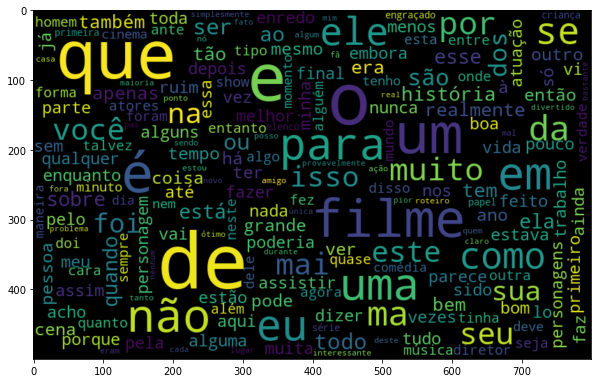

In [ ]:
# Definindo uma função para gerar um WordCloud 

def def_word_cloud(data, sentiment, plot, column):
    global all_words, words_cloud

    x = data.query(f'sentiment == {sentiment}')
    
    all_words = ' '.join([c for c in x[column]])

    words_cloud = WordCloud.generate(all_words)

    if plot == 'yes':
        plt.figure(figsize = (10,8))
        plt.imshow(words_cloud, interpolation = 'bilinear')
        plt.show()

    else:
        pass

#def_word_cloud(df, 0, 'yes')
#def_word_cloud(df, 1, 'yes')
#def_word_cloud(df, [0, 1], 'yes', 'text_pt')

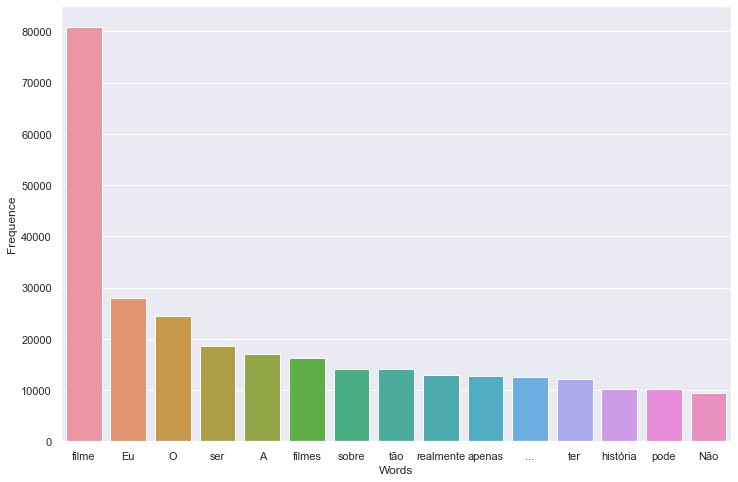

In [ ]:
# Visualizando a frequência de cada palavra dentro do nosso DataFrame
def def_word_frequence(data, sentiment, column, n):
    global tokenized_white_space, frequence, df_word_frequence, all_words, stop_words
    
    stop_words = nltk.corpus.stopwords.words('Portuguese')
    stop_words = stop_words + [c for c in punctuation]

    x = data.query(f'sentiment == {sentiment}')
    all_words = ' '.join([c for c in x[column]])

    tokenized_white_space = tokenize.WhitespaceTokenizer().tokenize(all_words)

    all_words = [c for c in tokenized_white_space]
    all_words = ' '.join(all_words)

    tokenize_word_punct = tokenize.WordPunctTokenizer().tokenize(all_words)

    frequence = nltk.FreqDist(tokenize_word_punct)

    df_word_frequence = pd.DataFrame(columns = ['Words', 'Frequence'], data = list(zip(frequence.keys(), frequence.values())))

    for c in stop_words:
        for k in df_word_frequence.nlargest(columns = 'Frequence', n = len(df_word_frequence)).Words:
            if c == k:
                df_word_frequence.drop(df_word_frequence.loc[df_word_frequence['Words'] == k].index, inplace = True)
                 
    sns.set( rc = {'figure.figsize': (12,8)})
    sns.barplot(x = 'Words', y = 'Frequence', data = df_word_frequence.nlargest(columns = 'Frequence', n = n))

#def_word_frequence(df, 0, 'text_pt', 15)
#def_word_frequence(df, 1, 'text_pt', 15)
#def_word_frequence(df, [0,1], 'text_pt', 15)

In [ ]:
# Tratando todos os nossos dados 

def def_tratamento():
    new_sentences = []

    for c in df['text_pt']:
        new_sentence = []
        text_words = tokenize.WordPunctTokenizer().tokenize(c)

        for k in text_words:
            if k not in stop_words:
                new_sentence.append(k.lower())

        new_sentence = [Stemmer.stem(j) for j in new_sentence]
        new_sentence = [unidecode.unidecode(i) for i in new_sentence]

        new_sentences.append(' '.join(new_sentence))

    df['Tratamento'] = new_sentences

#def_tratamento()

In [ ]:
# Atribuindo pesos as palavras do nosso texto afim de treinar o modelo 

Tfidf = TfidfVectorizer(lowercase = True, ngram_range = (1,2))
tfidf_tratment = Tfidf.fit_transform(df['Tratamento'])

def_model_train_test(df, tfidf_tratment, df.sentiment, LogisticRegression, '')

df_weights = pd.DataFrame(LogisticRegression.coef_[0].T, index = Tfidf.get_feature_names())
df_weights.nlargest(10,0)

O modelo LogisticRegression() obteve 88.96% de accuracy


In [ ]:
tfidf_tratment = Tfidf.fit_transform(df['text_pt'])

def_model_train_test(df, tfidf_tratment, df.sentiment, LogisticRegression, '')
df_weights = pd.DataFrame(LogisticRegression.coef_[0].T, index = Tfidf.get_feature_names())
df_weights.nlargest(10,0)

O modelo LogisticRegression() obteve 89.07% de accuracy


# Regex Introduction 

In [ ]:
# Importando todas as bibliotecas que serão utilizadas 

import pandas as pd 
import re
import numpy as np

from sklearn.model_selection import train_test_split

from nltk.lm import Laplace
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.tokenize import WhitespaceTokenizer
from nltk.util import bigrams
from nltk.lm.preprocessing import pad_both_ends

# Regex's 
regex_html_01_codes = re.compile(r'<code>(.|\n)*?</code>')
regex_html_02_tags = re.compile(r'<.*?>')
regex_html_03_punctuation = re.compile(r'[^\w\s]')
regex_html_04_numbers = re.compile(r'^\d+')
regex_html_05_linebrokentag = re.compile(r'\n')
regex_html_06_whitespace = re.compile(r' +')

# Random State
SEED = 59
np.random.seed(SEED)

# Modelos
WhitespaceTokenizer = WhitespaceTokenizer()

In [ ]:
# Importando os dataframes que serão utilizados 

df_pt = pd.read_csv('G:\Meu Drive\My Repositories\datasets_for_data_science\databases\datasets\\stackoverflow_portuguese.csv')
df_en = pd.read_csv('G:\Meu Drive\My Repositories\datasets_for_data_science\databases\datasets\\stackoverflow_english.csv')

# Alterando os dados do nosso dataframe

df_pt['Idioma'] = 'port'
df_en['Idioma'] = 'eng'

In [ ]:
# Tratando dataframe values

def def_values_tratment(data, column):

    new_senteces = []   

    for c in data[column]:
        sentence_string = c
        sentence_string = regex_html_01_codes.sub(' ', sentence_string)
        sentence_string = regex_html_02_tags.sub(' ', sentence_string)
        sentence_string = regex_html_03_punctuation.sub(' ', sentence_string)
        sentence_string = regex_html_04_numbers.sub(' ', sentence_string)
        sentence_string = regex_html_05_linebrokentag.sub('', sentence_string)
        sentence_string = regex_html_06_whitespace.sub(' ', sentence_string)
        sentence_string = sentence_string.lower()
        new_senteces.append(sentence_string)

    data[column + '_Tratamento'] = new_senteces    

def_values_tratment(df_pt, 'Questão')
def_values_tratment(df_en, 'Questão')

In [ ]:
# Criando o modelo MLE para Português e Inglês

def def_modelo_mle_pt_split(x):
    global test_pt, train_pt

    train_pt, test_pt = train_test_split(x, test_size = 0.2)

    train_all_senteces = ' '.join(train_pt)
    train_all_words = WhitespaceTokenizer.tokenize(train_all_senteces)
    train_bigram, vocabulary_bigramns = padded_everygram_pipeline(2, train_all_words)

    modelo = Laplace(2)
    modelo.fit(train_bigram, vocabulary_bigramns)
    
    return modelo

def def_modelo_mle_en_split(x):
    global test_en, train_en

    train_en, test_en = train_test_split(x, test_size = 0.2)

    train_all_senteces = ' '.join(train_en)
    train_all_words = WhitespaceTokenizer.tokenize(train_all_senteces)
    
    train_bigram, vocabulary_bigramns = padded_everygram_pipeline(2, train_all_words)

    modelo = Laplace(2)
    modelo.fit(train_bigram, vocabulary_bigramns)

    return modelo

model_laplace_pt = def_modelo_mle_pt_split(df_pt.Questão_Tratamento)
model_laplace_en = def_modelo_mle_en_split(df_en.Questão_Tratamento)

In [ ]:
def perplexity_counter(model, data):
    global words, fake_char, words_bigrams

    perplexities = 0
    words = WhitespaceTokenizer.tokenize(data)
    fake_char = [list(pad_both_ends(c, n = 2)) for c in words]
    words_bigrams = [list(bigrams(k)) for k in fake_char]
    for word in words_bigrams:
        perplexities = model.perplexity(word) + perplexities
    
    return perplexities

In [ ]:
def language_classifier(data):

    results = []

    if type(data) != str:
        for row in data:
            return_pt = perplexity_counter(model_laplace_pt, row)
            return_en = perplexity_counter(model_laplace_en, row)

            if return_pt < return_en:
                results.append('Português')
            
            else:
                results.append('English')

        df_results = pd.DataFrame(columns = ['Text', 'Predict'], data = list(zip(data, results)))

    else:
        return_pt = perplexity_counter(model_laplace_pt, data)
        return_en = perplexity_counter(model_laplace_en, data)

        if return_pt < return_en:
            results.append('Português')
            
        else:
            results.append('English')   
        
        df_results = pd.DataFrame(columns = ['Text', 'Predict'], data = zip([data], results) )
        print(list(zip(data, results)))
    return df_results

In [ ]:
language_classifier('Eu sou o cara mais lindo desse planeta')

[('E', 'Português')]


,Text,Predict
0,Eu sou o cara mais lindo desse planeta,Português


In [ ]:
type(test_pt)

pandas.core.series.Series

# Word2Vec Introdution

In [11]:
# Importando bibliotecas que serão utilizadas 

import pandas as pd
import nltk
import string 
import numpy as np 

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from gensim.models import KeyedVectors

# Modelos

SEED = 13
np.random.seed(SEED)

LogisticRegression = LogisticRegression(max_iter = 200)
DummyClassifier = DummyClassifier()

In [17]:
# Modelo gensim KeyedVector CBOW

keyed_vector_model_cbow = KeyedVectors.load_word2vec_format(r"G:\Meu Drive\My Repositories\Datasets_for_data_science\Word2Vec\datas\Nilc\Cbow\\word2vec_cbow_s300.txt")

# Modelo gensim KeyedVector SkipGram

keyed_vector_model_skipgram = KeyedVectors.load_word2vec_format(r"G:\Meu Drive\My Repositories\Datasets_for_data_science\Word2Vec\datas\Nilc\Skipgram\\word2_vec_skip_s300.txt")

In [23]:
# Importando dataframes que serão utilizados

df_train = pd.read_csv('G:\Meu Drive\My Repositories\Datasets_for_data_science\databases\datasets\\News_train_pt02.csv')
df_test = pd.read_csv('G:\Meu Drive\My Repositories\Datasets_for_data_science\databases\datasets\\News_test_pt01.csv')

In [24]:
# Criando tokenizador de frases

def def_tokenizer(data):
    data_alphanumeric = []
    data = data.lower()
    data = nltk.word_tokenize(data)

    for c in data:  
        if c in string.punctuation: continue
        else: data_alphanumeric.append(c)

    return data_alphanumeric

In [25]:
# Criando vetorizado de palavras 

def def_vetorizer(data, model):
    vetor_final = np.zeros(300)

    for c in data:
        try:
            vetor_final += model.get_vector(c)
        
        except KeyError:
            vetor_final += model.get_vector('unknown')
            
    return vetor_final

In [26]:
# Criando função tokenizar e vetorizar cada frase de um data desejado

def def_tokenizer_vetorizer(data, model):
    x = len(data)
    y = 300
    matriz = np.zeros((x, y))

    for i in range(x):
        alphanumeric_text = def_tokenizer(data.iloc[i])   
        vetorized_text = def_vetorizer(alphanumeric_text, model)
        matriz[i] = vetorized_text
    
    return matriz

train_vetors_cbow = def_tokenizer_vetorizer(df_train.title, keyed_vector_model_cbow)
test_vetors_cbow = def_tokenizer_vetorizer(df_test.title, keyed_vector_model_cbow)

train_vetors_skipgram = def_tokenizer_vetorizer(df_train.title, keyed_vector_model_skipgram)
test_vetors_skipgram = def_tokenizer_vetorizer(df_test.title, keyed_vector_model_skipgram)

In [29]:
# Classificando medindo e etc o modelo CBOW

# Definindo uma baseline para nosso modelo 

DummyClassifier.fit(train_vetors_cbow, df_train.category)

predict_dummy_cbow = DummyClassifier.predict(test_vetors_cbow)
accuracy_dummy_cbow = accuracy_score(df_test.category, predict_dummy_cbow) * 100
report_dummy_cbow = classification_report(df_test.category, predict_dummy_cbow)

print(f'A acurácia do modelo "Dummy Classifier" foi de {accuracy_dummy_cbow:.2f}%')
print(report_dummy_cbow)

# Treinando, testando e medindo nosso modelo de classificação logistica regressiva 

LogisticRegression.fit(train_vetors_cbow, df_train.category)

predict_lr_cbow = LogisticRegression.predict(test_vetors_cbow)
accuracy_lr_cbow = accuracy_score(df_test.category, predict_lr_cbow) * 100
report_lr_cbow = classification_report(df_test.category, predict_lr_cbow)

print(f'A accurácia do modelo "Logistic Regression" foi de {accuracy_lr_cbow:.2f}%')
print(report_lr_cbow)

C:\Users\guilh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A acurácia do modelo "Dummy Classifier" foi de 29.75%
              precision    recall  f1-score   support

     colunas       0.30      1.00      0.46      6103
   cotidiano       0.00      0.00      0.00      1698
     esporte       0.00      0.00      0.00      4663
   ilustrada       0.00      0.00      0.00       131
     mercado       0.00      0.00      0.00      5867
       mundo       0.00      0.00      0.00      2051

    accuracy                           0.30     20513
   macro avg       0.05      0.17      0.08     20513
weighted avg       0.09      0.30      0.14     20513

A accurácia do modelo "Logistic Regression" foi de 79.60%
              precision    recall  f1-score   support

     colunas       0.86      0.72      0.78      6103
   cotidiano       0.61      0.79      0.69      1698
     esporte       0.92      0.88      0.90      4663
   ilustrada       0.13      0.88      0.23       131
     mercado       0.84      0.79      0.81      5867
       mundo       0

In [31]:
# Classificando medindo e etc o modelo SkipGram

# Definindo uma baseline para nosso modelo 

DummyClassifier.fit(train_vetors_skipgram, df_train.category)

predict_dummy_skipgram = DummyClassifier.predict(test_vetors_skipgram)
accuracy_dummy_skipgram = accuracy_score(df_test.category, predict_dummy_skipgram) * 100
report_dummy_skipgram = classification_report(df_test.category, predict_dummy_skipgram)

print(f'A acurácia do modelo "Dummy Classifier" foi de {accuracy_dummy_skipgram:.2f}%')
print(report_dummy_skipgram)

# Treinando, testando e medindo nosso modelo de classificação logistica regressiva 

LogisticRegression.fit(train_vetors_skipgram, df_train.category)

predict_lr_skipgram = LogisticRegression.predict(test_vetors_skipgram)
accuracy_lr_skipgram = accuracy_score(df_test.category, predict_lr_skipgram) * 100
report_lr_skipgram = classification_report(df_test.category, predict_lr_skipgram)

print(f'A accurácia do modelo "Logistic Regression" foi de {accuracy_lr_skipgram:.2f}%')
print(report_lr_skipgram)

C:\Users\guilh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\guilh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A acurácia do modelo "Dummy Classifier" foi de 29.75%
              precision    recall  f1-score   support

     colunas       0.30      1.00      0.46      6103
   cotidiano       0.00      0.00      0.00      1698
     esporte       0.00      0.00      0.00      4663
   ilustrada       0.00      0.00      0.00       131
     mercado       0.00      0.00      0.00      5867
       mundo       0.00      0.00      0.00      2051

    accuracy                           0.30     20513
   macro avg       0.05      0.17      0.08     20513
weighted avg       0.09      0.30      0.14     20513



C:\Users\guilh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


A accurácia do modelo "Logistic Regression" foi de 80.72%
              precision    recall  f1-score   support

     colunas       0.86      0.72      0.78      6103
   cotidiano       0.62      0.81      0.70      1698
     esporte       0.93      0.89      0.91      4663
   ilustrada       0.15      0.90      0.25       131
     mercado       0.85      0.82      0.83      5867
       mundo       0.76      0.86      0.81      2051

    accuracy                           0.81     20513
   macro avg       0.69      0.83      0.71     20513
weighted avg       0.84      0.81      0.82     20513



# Word Embedding & API

In [76]:
# Importando bibliotecas que serão utilizadas

import pandas as pd 
import numpy as np 
import spacy
import logging
import nltk
import string 

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Random State

SEED = 13
np.random.seed(SEED)

# Modelos 

Word2Vec_cbow = Word2Vec(sg = 0, window = 2, vector_size = 300, min_count = 5, alpha = 0.03, min_alpha = 0.007)
Word2Vec_skipgram = Word2Vec(sg = 1, window = 5, vector_size = 300, min_count = 5, alpha = 0.03, min_alpha = 0.007)

In [2]:
# Importando dataframes que serão utilizados

df_train = pd.read_csv('G:\Meu Drive\My Repositories\Datasets_for_data_science\databases\datasets\\News_train_pt02.csv')
df_test = pd.read_csv('G:\Meu Drive\My Repositories\Datasets_for_data_science\databases\datasets\\News_test_pt01.csv')

# Textos semi tratados para as funções

data_semi_tratment_str = [c.lower() for c in df_train['title']]

In [3]:
# Spacy models

nlp = spacy.load('pt_core_news_sm', disable=["paser", "ner", "tagger", "textcat"])

In [4]:
# Função para tratar strings

def tratment_str(data):
    new_data = []

    for c in data:
        error_test = not c.is_stop and c.is_alpha

        if error_test == True:
            new_data.append(c.text.lower())

    if len(new_data) >= 3:
        return ' '.join(new_data)

In [5]:
# Função para transformar o data em doc

def tratment_doc(data):
    lista = []

    for c in data.pipe(data_semi_tratment_str, batch_size = 1000, n_process = -1):
        lista.append(tratment_str(c))

    return lista

data_total_tratment_doc = tratment_doc(nlp)

In [6]:
# Criando dataframe com todos os dados docs processados e tratados

df_docs = pd.DataFrame(columns = ['titles'], data = data_total_tratment_doc)

# Tratando dados do dataframe docs

df_docs = df_docs.dropna().drop_duplicates()

# Lista de palavras do nosso daframe docs

lista_tokens = [c.split(' ') for c in df_docs.titles]

In [7]:
# Construindo vocabulário do modelo CBow

#logging.basicConfig(format="%(asctime)s : - %(message)s", level = logging.INFO)

Word2Vec_cbow.build_vocab(lista_tokens)
Word2Vec_cbow.train(lista_tokens, total_examples = Word2Vec_cbow.corpus_count, epochs = 30)

(14583731, 16207260)

In [10]:
# Construindo vocabulário do modelo CBow

#logging.basicConfig(format="%(asctime)s : - %(message)s", level = logging.INFO)

Word2Vec_skipgram.build_vocab(lista_tokens)
Word2Vec_skipgram.train(lista_tokens, total_examples = Word2Vec_skipgram.corpus_count, epochs = 30)

(14584638, 16207260)

In [11]:
# Salvando os modelos CBow e SkipGram

Word2Vec_cbow.wv.save_word2vec_format(r"G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\library's\keras_library\w2v_models\\Word2Vec_cbow_ap.txt")
Word2Vec_skipgram.wv.save_word2vec_format(r"G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\library's\keras_library\w2v_models\\Word2Vec_skipgram_ap.txt")

In [12]:
# Carregando modelos 

Word2Vec_cbow_model = KeyedVectors.load_word2vec_format(r"G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\library's\keras_library\w2v_models\\Word2Vec_cbow_ap.txt")
Word2Vec_skipgram_model = KeyedVectors.load_word2vec_format(r"G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\library's\keras_library\w2v_models\\Word2Vec_skipgram_ap.txt")

In [13]:
# Definindo funções para classificar nossos modelos

# Função para tratar strings

def def_tokenizer(data):

    new_data = []
    data = nlp(data)

    for c in data:
        error_test = not c.is_stop and c.is_alpha

        if error_test == True:
            new_data.append(c.text.lower())

    return new_data

In [14]:
# Criando vetorizado de palavras 

def def_vetorizer(data, model):
    vetor_final = np.zeros(300)

    for c in data:
        try:
            vetor_final += model.get_vector(c)
        
        except KeyError: pass
            
    return vetor_final

In [15]:
# Criando função tokenizar e vetorizar cada frase de um data desejado

def def_tokenizer_vetorizer(data, model):
    x = len(data)
    y = 300
    matriz = np.zeros((x, y))

    for i in range(x):
        alpha_text = def_tokenizer(data.iloc[i])   
        vetorized_text = def_vetorizer(alpha_text, model)
        matriz[i] = vetorized_text
    
    return matriz

train_vetors_cbow = def_tokenizer_vetorizer(df_train.title, Word2Vec_cbow_model)
test_vetors_cbow = def_tokenizer_vetorizer(df_test.title, Word2Vec_cbow_model)

train_vetors_skipgram = def_tokenizer_vetorizer(df_train.title, Word2Vec_skipgram_model)
test_vetors_skipgram = def_tokenizer_vetorizer(df_test.title, Word2Vec_skipgram_model)

In [83]:
# Função que define nossos modelos para poder ser usado na classificação 

def model_view(train_x, train_y, test_x, test_y):
    
    model = LogisticRegression(max_iter = 800)
    model.fit(train_x, train_y)
    predict = model.predict(test_x)

    return model  

lr_cbow = model_view(train_vetors_cbow, df_train.category, test_vetors_cbow, df_test.category)
lr_skipgram = model_view(train_vetors_skipgram, df_train.category, test_vetors_skipgram, df_test.category)

In [141]:
# Função para classificar um título dado

# O SkipGram passou a ser usado como modelo padrão por ter apresentado maior accuracy

def classifier(data):
    df_predict = pd.DataFrame([data], columns = ['input'])
      
    x = def_tokenizer_vetorizer(df_predict.input, Word2Vec_skipgram_model)
    
    predict = lr_skipgram.predict(x)
    result = print(f'O título de artigo digitado é do tipo: "{predict[0].capitalize()}"')
    
    return result

In [143]:
classifier('Barcelona e Real Madrid jogam hoje a final da Champions League')

O título de artigo digitado é do tipo: "Esporte"


In [146]:
classifier('Alemanha e Estado Unidos entram em conflito')

O título de artigo digitado é do tipo: "Mundo"


In [149]:
classifier('Alemanha e Estado Unidos fecham acordo para vacinar pobres')

O título de artigo digitado é do tipo: "Mercado"


# Twitter Computer Vision API

In [1]:
# Importando bibliotecas que serão utilizadas

import tweepy as tt
import pandas as pd

from twitter_apis_keys import twitter_key, azure_key

from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes

# Modelos

azure = azure_key()

# Importando keys do Twiitter APP

api_key, api_key_secret, acess_token, acess_token_secret = twitter_key()

# Gerando autorização do Tweepy

auth = tt.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(acess_token, acess_token_secret)
api = tt.API(auth)

In [5]:
# Gerando um Tweet com Tweepy

api.update_status('First API Tweet')

In [15]:
# Gernado um cursor para buscar informações passadas no Twitter

tweets = tt.Cursor(api.search_tweets, lang = 'pt', since = '2021-12-13', q = 'SpiderManNoWayHome').items(15)

for c in tweets:
    print(f'O usuário: {c.user.screen_name}')
    print(f'comentou: {c.text}')
    if 'media' in c.entities:
        print('Photo Url:', c.entities['media'][0]['media_url'])
    print('\n')

Unexpected parameter: since


O usuário: amandadelcorral
comentou: RT @BRMarvelNews: 🚨 Com 20 críticas adicionadas, #SpiderManNoWayHome debuta com 100% de aprovação no Rotten Tomatoes. https://t.co/457gVtEG…


O usuário: kccties
comentou: RT @nacaomarveI: HITOU DEMAIS! #SpiderManNoWayHome está com 100% e 45 reviews no RottenTomatoes. https://t.co/KNxCWou8Vj
Photo Url: http://pbs.twimg.com/media/FGkUvJFWYAAg-sH.jpg


O usuário: stanhollandxs
comentou: RT @nacaomarveI: HITOU DEMAIS! #SpiderManNoWayHome está com 100% e 45 reviews no RottenTomatoes. https://t.co/KNxCWou8Vj
Photo Url: http://pbs.twimg.com/media/FGkUvJFWYAAg-sH.jpg


O usuário: ellasplace_
comentou: RT @nacaomarveI: SEM SPOILERS 🤫

Tom Holland, Zendaya, Jacob Batalon e Jamie Foxx em novo comercial pedindo para não espalharem spoilers do…


O usuário: gryfflovs
comentou: RT @nacaomarveI: HITOU DEMAIS! #SpiderManNoWayHome está com 100% e 45 reviews no RottenTomatoes. https://t.co/KNxCWou8Vj
Photo Url: http://pbs.twimg.com/media/FGkUvJFWYAAg-sH.jpg


O usuá

In [17]:
# Gerando um cursor para buscar medias postadas por certas pessoas no Twitter

pessoas = ['dufyzz', 'muriblorrs', 'tonytheboy_', 'lucasinutilismo', 'oednaldopereira', 'persiandollgia', 'sofiasantino',
           '_Aisinha_', 'Casimiro', 'TomHolland1996', 'Marvel', 'Anita', 'Zendaya', 'Homem Aranha', 'Andew Garfield',
           'Messi', 'PSG', 'Ajax', 'Neymar']

for pessoa in pessoas:
    print(f'\nSegue tweets de {pessoa.capitalize()}: \n')

    tweets = tt.Cursor(api.search_tweets, q = pessoa, since = '2021-01-12').items(5)

    for tweet in tweets:
        if 'media' in tweet.entities:
            print(tweet.entities['media'][0]['media_url'])
        
        else: continue

Unexpected parameter: since



Segue tweets de Dufyzz: 



Unexpected parameter: since


http://pbs.twimg.com/media/FGfxXdxXMAIrmPi.jpg
http://pbs.twimg.com/media/FGiJ70SXEAMvO1J.png

Segue tweets de Muriblorrs: 



Unexpected parameter: since



Segue tweets de Tonytheboy_: 



Unexpected parameter: since



Segue tweets de Lucasinutilismo: 



Unexpected parameter: since



Segue tweets de Oednaldopereira: 



Unexpected parameter: since


http://pbs.twimg.com/media/FGf9iCBWQAEnocH.jpg
http://pbs.twimg.com/media/FGf9iCBWQAEnocH.jpg
http://pbs.twimg.com/media/FGf9iCBWQAEnocH.jpg
http://pbs.twimg.com/media/FGLpC68XwAYAwqr.jpg
http://pbs.twimg.com/media/FGLc_Q4XsAop7Gi.jpg

Segue tweets de Persiandollgia: 



Unexpected parameter: since



Segue tweets de Sofiasantino: 



Unexpected parameter: since


http://pbs.twimg.com/media/FGkkD5yXIAMGWT1.jpg

Segue tweets de _aisinha_: 



Unexpected parameter: since



Segue tweets de Casimiro: 



Unexpected parameter: since


http://pbs.twimg.com/ext_tw_video_thumb/1470749173737824263/pu/img/6AP_iWfRLsewjVQ8.jpg
http://pbs.twimg.com/media/FGkmlD7WYAoxviX.jpg

Segue tweets de Tomholland1996: 



Unexpected parameter: since


http://pbs.twimg.com/media/FGkmd1mUUAoHtxO.png

Segue tweets de Marvel: 



Unexpected parameter: since


http://pbs.twimg.com/media/FGioVhhXoAgqSM5.jpg
http://pbs.twimg.com/media/FGiaUISWUAI5kim.png

Segue tweets de Anita: 



Unexpected parameter: since



Segue tweets de Zendaya: 



Unexpected parameter: since


http://pbs.twimg.com/media/FGkmoFWUYAUbx9M.jpg
http://pbs.twimg.com/media/FGj_RrBXsAEV5CC.jpg
http://pbs.twimg.com/media/FGkmna9WQAI7fqS.jpg

Segue tweets de Homem aranha: 



Unexpected parameter: since


http://pbs.twimg.com/media/FGkmnY0XsAMQKcK.jpg

Segue tweets de Andew garfield: 



Unexpected parameter: since



Segue tweets de Messi: 



Unexpected parameter: since


http://pbs.twimg.com/media/FGh2kM7WYAovkiA.jpg
http://pbs.twimg.com/ext_tw_video_thumb/1169304202574782465/pu/img/svOCk5VV4wfRCL-N.jpg
http://pbs.twimg.com/media/E5-x98iVIAI-c8Q.jpg
http://pbs.twimg.com/media/FGkjh9uWQAgtst1.jpg

Segue tweets de Psg: 



Unexpected parameter: since


http://pbs.twimg.com/media/FGbzRAoXIAQX9tr.jpg

Segue tweets de Ajax: 



Unexpected parameter: since


http://pbs.twimg.com/ext_tw_video_thumb/1470657215132356608/pu/img/44DYTNhnsfrcNS6y.jpg
http://pbs.twimg.com/media/FGkmlUhXwAcNGEg.jpg

Segue tweets de Neymar: 

http://pbs.twimg.com/media/FGkevIwXEAUwoeF.jpg
http://pbs.twimg.com/ext_tw_video_thumb/1402574426617548800/pu/img/qN6-979sPYGk0T_o.jpg
http://pbs.twimg.com/media/FGkevIwXEAUwoeF.jpg
http://pbs.twimg.com/media/FGkevIwXEAUwoeF.jpg


In [24]:
# Gerando um streaming em tempo real para buscar tweets sobre alguém no Twitter

# Código quebrado pela biblioteca !!!

'''
class MyStreamListener(tt.Stream):

    def on_status(self, status):
        print(status.user.screen_name)
        print(status.text)

MyStreamListener = MyStreamListener()
stream = tt.Stream(api_key, listener = MyStreamListener)
stream.filter_level(trach = ['SpiderManNoWay Home'])
'''

KeyboardInterrupt: 

In [2]:
# Gerando um streaming em tempo real para buscar tweets sobre alguém no Twitter

# Código funcionando mas sem a possibilidade de filter/track

class IDPrinter(tt.Stream):

    def on_status(self, status):
        print(f'O usuário: {status.user.screen_name}')
        print(f'comentou: {status.text}\n')

printer = IDPrinter(api_key, api_key_secret, acess_token, acess_token_secret)
printer.sample(languages = ['pt'])

O usuário: carolzinhavig
comentou: 6 meses pro meu aniversário ainda,pros meus 30 ANOS e eu só consigo pensa nisso,quero tudo do jeito que sempre fale… https://t.co/UR0oY2pv1b

O usuário: MoonnHoneey
comentou: RT @worldjiminssi: O MOTIVO DO MEU COLAPSO FOI ACORDAR E VER PARK JIMIN DE LONG HAIR https://t.co/RvzqmKUY94

O usuário: praiamarexpress
comentou: Aqui você pode acordar com essa belíssima vista da praia de Ponta Negra! 🥰💙 https://t.co/mmtbRwIr1X

O usuário: ricardodalsente
comentou: o que os olhos nao ve os amigo manda print, vulgo @Gabrielciprianl KKKKKKKKKKKK

O usuário: biicorrea2002
comentou: e vamos de 12 hrs né

O usuário: putinhoputifero
comentou: @deusdobalao Oxe manito , vai chegar

O usuário: saiwaltrick
comentou: RT @djullyb: Me preservar (ficar dentro da minha casa por que se eu abro a porta some 200 reais da minha conta)

O usuário: izabrittx
comentou: fiz 120 abdominal mas tô de boa sim mano

O usuário: vieiraaa_a
comentou: RT @amareisz: talvez o “para sempre” seja

KeyboardInterrupt: 

In [168]:
# Computer Vision análise de uma imagem e as chaves relacionadas com o

url = 'https://pbs.twimg.com/media/FDYqq68XMBYQlkp?format=jpg&name=medium'
image1 = azure.analyze_image(url, visual_features = [VisualFeatureTypes.tags])

for tag in image1.tags:
    print(tag.confidence)

0.995051383972168
0.9838101863861084
0.9784435033798218
0.9688198566436768
0.951404869556427
0.9495416283607483
0.9403545260429382
0.9195836782455444
0.8809210062026978
0.8792086839675903
0.863280177116394
0.7664843797683716
0.7491441965103149


In [16]:
# Computer Vision descrição de uma imagem 

url = 'https://pbs.twimg.com/media/FGdP7JeXIAcPZBK?format=jpg&name=small'
image2 = azure.describe_image(url, 1, 'en')

for c in image2.captions:
    print(f'{c.text} with {float(c.confidence)* 100:.2f}% of confidence')

a couple of men wearing medical scrubs and posing for the camera with 45.60% of confidence


In [68]:
# Computer Vision análise de imagem com busca específica (Celebrities no caso) 

url = 'https://pbs.twimg.com/media/FF4_fPsUYAAwrwY?format=jpg&name=medium'
image3 = azure.analyze_image_by_domain('celebrities', url)

for c in image3.result['celebrities']:
    name = c['name']
    confidence = float(c['confidence']) * 100
    print(f'In the photo we got {name} with {confidence:.2f}% of confidence')

In the photo we got Dwayne Johnson with 99.98% of confidence


In [18]:
# Função para coletar dados do Twitter sobre um determinado tema

def twitter_analize(theme, since, lang, items):

    photos_url = []
    users_data = []

    # Coletando dados de tweets sobre temas específicos

    tweets = tt.Cursor(api.search_tweets, lang = lang, since = since, q = theme).items(items)

    for c in tweets:
        
        id = c._json['id']
        user_name = c.user.screen_name
        text = c.text
        photo_url = ''
        photo_tags = ''
        photo_tags_confidence = ''
        photo_descriptions = ''
        photo_descriptions_confidence = ''
        photo_celebrities= ''
        photo_celebrities_confidence = ''

        user_dict = {'id': id, 'user_name': user_name, 'tweet': text,
                       'photo_url': photo_url, 'photo_tags': photo_tags, 'photo_tags_confidence': photo_tags_confidence, 
                       'photo_descriptions': photo_descriptions, 'photo_descriptions_confidence': photo_descriptions_confidence, 
                       'photo_celebrities': photo_celebrities, 'photo_celebrities_confidence': photo_celebrities_confidence}
                       
        if 'media' in c.entities:
            url = c.entities['media'][0]['media_url']
            
            if url not in photos_url:
                photos_url.append(url)
                user_dict['photo_url'] = url
        
        if user_dict not in users_data:
            users_data.append(user_dict)
    
    return photos_url, users_data

#photos_url, tweets_data = twitter_analize('neymar', '2021-12-01', 'pt', 50)

In [17]:
tags_var = azure.tag_image('https://pbs.twimg.com/profile_images/3478244961/01ebfc40ecc194a2abc81e82ab877af4_400x400.jpeg')

for c in tags_var.tags:
    tags = []
    c.ap
    print(c.name)
    print('\n')

{'additional_properties': {}, 'name': 'human face', 'confidence': 0.9787280559539795, 'hint': None}
human face


{'additional_properties': {}, 'name': 'person', 'confidence': 0.975425124168396, 'hint': None}
person


{'additional_properties': {}, 'name': 'man', 'confidence': 0.9438461065292358, 'hint': None}
man


{'additional_properties': {}, 'name': 'chest', 'confidence': 0.8873760104179382, 'hint': None}
chest


{'additional_properties': {}, 'name': 'human', 'confidence': 0.8517582416534424, 'hint': None}
human


{'additional_properties': {}, 'name': 'muscle', 'confidence': 0.8465869426727295, 'hint': None}
muscle


{'additional_properties': {}, 'name': 'human beard', 'confidence': 0.840328574180603, 'hint': None}
human beard


{'additional_properties': {}, 'name': 'indoor', 'confidence': 0.6007462739944458, 'hint': None}
indoor




In [22]:
# Função para analisar fotos recuperadas

# Função para analisar fotos recuperadas

def photo_analyzer(photos_url, users_data):
    global tags, celebritie


    # Tags, descrição e reconhecimento de celebridades relacionadas a imagem

    for i in range(0, len(photos_url)):        
        celebritie, celebritie_confidence = [], []
        tags, tags_confidence = [], []

        url = photos_url[i]

        image_var = azure.describe_image(url, 1, langauge = 'en')
        celebrities_var = azure.analyze_image_by_domain('celebrities', url)
        tags_var = azure.tag_image(url)

        for c in tags_var.tags:
            tags.append(c.name)
            tags_confidence.append(c.confidence)
            
        for c in image_var.captions:
            description = c.text
            description_confidence = c.confidence
        
        for c in celebrities_var.result['celebrities']:
            celebritie.append(c['name'])
            celebritie_confidence.append(c['confidence'])
        
        for c in users_data:
            if c['photo_url'] == url:

                c['photo_tags'] = tags
                c['photo_tags_confidence'] = tags_confidence
                c['photo_descriptions'] = description
                c['photo_descriptions_confidence'] = description_confidence
                c['photo_celebrities']= celebritie
                c['photo_celebrities_confidence'] = celebritie_confidence

#photo_analyzer(photos_url, tweets_data)

In [23]:
# Função que reune todos os passos para que a API funcione corretamenet

def general(theme, since, language, items):

    data = []
    photos_url, tweets_data = twitter_analize(theme, since, language, items)
    photo_analyzer(photos_url, tweets_data)

    df_twitter = pd.DataFrame().from_dict(tweets_data)

    return df_twitter

In [24]:
data = general('cristiano ronaldo', '2021-01-01', 'en', 100)
data.loc[data['photo_url'] != '']

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


,id,user_name,tweet,photo_url,photo_tags,photo_tags_confidence,photo_descriptions,photo_descriptions_confidence,photo_celebrities,photo_celebrities_confidence
13,1470938620408340482,ItzJustHA,RT @cr7raprhymes: 🚨 Cristiano Ronaldo has test...,http://pbs.twimg.com/media/FGkdtE5X0AY1xWc.jpg,"[person, soccer, human face, sportswear, sport...","[0.9966787695884705, 0.9807858467102051, 0.912...",Cristiano Ronaldo in a red shirt,0.546339,[Cristiano Ronaldo],[0.9999853372573853]
14,1470938406922432518,SOSA_KING6,RT @ElitxCR7: An Explanation is still pending ...,http://pbs.twimg.com/ext_tw_video_thumb/146934...,"[grass, artificial turf, soccer-specific stadi...","[0.9929685592651367, 0.9423290491104126, 0.920...",a group of men playing football,0.578667,[],[]
26,1470937748806717449,Z0Zvm,RT @TeamCRonaldo: Cristiano Ronaldo vs Atletic...,http://pbs.twimg.com/media/FGfnEHhVkAQwsRg.jpg,"[person, soccer, sport, outdoor, man, stadium,...","[0.9984390139579773, 0.9872357845306396, 0.956...",Cristiano Ronaldo in a sports uniform,0.475314,[Cristiano Ronaldo],[0.999921441078186]
52,1470935976293941250,Matt_srs77,RT @damonagain1: Here to post Cristiano Ronald...,http://pbs.twimg.com/media/FGiivYAWQAEeqG5.jpg,"[grass, stadium, person, player, sport venue, ...","[0.9937937259674072, 0.9794683456420898, 0.978...",a person in a red shirt jumping in the air wit...,0.403552,[],[]
63,1470935425766223873,RonaldinhoG6,@Globe_Soccer @Cristiano It's rigged if Ronald...,http://pbs.twimg.com/media/FFdVs7GVQAIdVAH.jpg,"[clothing, person, man, text, smile, human fac...","[0.9938862323760986, 0.9912399649620056, 0.986...","Cristiano Ronaldo, Cristiano Ronaldo posing fo...",0.524743,"[Cristiano Ronaldo, Cristiano Ronaldo]","[0.9999840259552002, 0.8575518131256104]"
79,1470934489664671748,yoowbish,RT @jojtiny: he just look like a 15 years old ...,http://pbs.twimg.com/media/FGk8YdGWYBYyOpd.jpg,"[human face, person, eyebrow, indoor, wall, cl...","[0.9988932609558105, 0.9977058172225952, 0.976...",a man in a white shirt,0.550271,[],[]
81,1470934401013870599,AriffShahrim,RT @MrFilipeOrlando: Cristiano Ronaldo to Dieg...,http://pbs.twimg.com/media/FGfmrXWX0AgMs4H.jpg,"[text, animated cartoon, illustration, animati...","[0.962277889251709, 0.902300238609314, 0.88124...",a group of people in a room,0.376,[],[]
92,1470933588782813185,ZlaTanTricky,RT @FootyHumour: Sergio Ramos having to two-fo...,http://pbs.twimg.com/media/FGfDf88X0AIEikS.jpg,"[clothing, person, sky, human face, toddler, b...","[0.9974746704101562, 0.9973843097686768, 0.979...",a boy holding a chainsaw,0.411263,[],[]
93,1470933399108038656,_chernandez4,RT @CR7Comps: When Cristiano Ronaldo faced Atl...,http://pbs.twimg.com/ext_tw_video_thumb/147041...,"[person, man, clothing, stadium, soccer, human...","[0.9949100017547607, 0.9892479181289673, 0.972...","Cristiano Ronaldo, Karim Benzema are posing fo...",0.486307,"[Cristiano Ronaldo, Karim Benzema]","[0.9999957084655762, 0.9992225170135498]"


# Face analysis and classification: Computer Vision OpenCV

In [1]:
# Importando bibliotecas que serão utilizadas

import cv2
import os
import shutil 
import dlib
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from os import listdir, path, makedirs
from os.path import isfile, join

# Cursores

SEED = 13
np.random.seed(SEED)

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


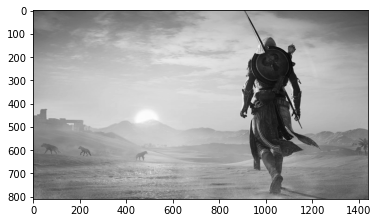

In [3]:
# Importando uma imagem e trabalhando com as conversões de cores 

image_original = cv2.imread(r"G:\Meu Drive\My Repositories\Datasets_for_data_science\facial_recognizer\datas\geral\\XboxOneX_33.jpg")
image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_original, cv2.COLOR_RGB2GRAY)

print(plt.imshow(image_original))
print(plt.imshow(image_rgb))
print(plt.imshow(image_gray, cmap = 'gray'))

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


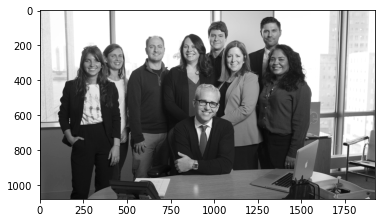

In [4]:
# Importando uma imagem para testar reconhecimento facial

image_original = cv2.imread(r"G:\Meu Drive\My Repositories\Datasets_for_data_science\facial_recognizer\datas\geral\\people.jpg")
image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_original, cv2.COLOR_RGB2GRAY)
image_rectangles = image_rgb.copy()

print(plt.imshow(image_original))
print(plt.imshow(image_rgb))
print(plt.imshow(image_gray, cmap = 'gray'))

# Delimitando o recorte de uma imagem de forma manual 

image_roi = image_original[420:640, 750:1150]
image_roi = cv2.cvtColor(image_roi, cv2.COLOR_BGR2RGB)
#print(plt.imshow(image_roi))

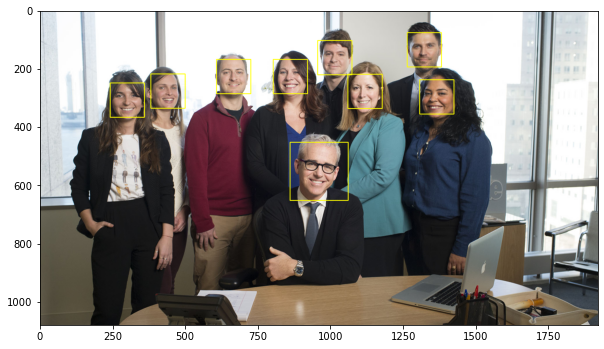

In [5]:
# Aplicando um classificador automático de rostos

face_classifier = cv2.CascadeClassifier(r"G:\Meu Drive\My Repositories\Datasets_for_data_science\facial_recognizer\cv2_models\haar\\haarcascade_frontalface_default.xml")
face_counter = face_classifier.detectMultiScale(image_gray, 1.7, 5)

# Gerando um recorte de todas as faces detectas no classificador 

for (x, y, w, h) in face_counter:
    cv2.rectangle(image_rectangles, (x, y), (x+w, y+h), (255, 255, 0), 2)

plt.figure(figsize= (10,10))
plt.imshow(image_rectangles)

# Salvando os recortes de cada face em um diretório 

index = 0
for (x, y, w, h) in face_counter:
    index += 1
    image_roi = image_original[y:y+h, x:x+w]
    #image_roi = cv2.cvtColor(image_roi, cv2.COLOR_BGR2RGB)
    image_roi = cv2.imwrite(f"images_rois\\image_roi{index}.jpg", image_roi)

In [6]:
# Abrindo o dataset que será utilizado para treino e teste
dataset_path = r"G:\Meu Drive\My Repositories\Datasets_for_data_science\facial_recognizer\datas\faces\Georgia Tech\cropped_faces\\"
files = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f))]

In [7]:
# Separando os dados de treino e teste 
train_path = r"G:\Meu Drive\My Repositories\Datasets_for_data_science\facial_recognizer\datas\faces\Georgia Tech\faces_train\\"
test_path = r"G:\Meu Drive\My Repositories\Datasets_for_data_science\facial_recognizer\datas\faces\Georgia Tech\faces_test\\"

if not path.exists(train_path):
    makedirs(train_path)

if not path.exists(test_path):
    makedirs(test_path)

for file in files:
    name = file[0:3]
    number = file[4:6]
    
    if int(number) <= 10:
        shutil.copyfile(dataset_path + file, train_path + file)
    
    else: 
        shutil.copyfile(dataset_path + file, test_path + file)

train_files_path = [f for f in listdir(train_path) if isfile(join(train_path, f))]
test_files_path = [f for f in listdir(test_path) if isfile(join(test_path, f))]

In [8]:
# Padronizando as imagens para um modelo ideal 

def image_pattern(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (200, 200), interpolation = cv2.INTER_LANCZOS4)
    return image

In [9]:
def train_test_split_data(train_files_path, test_files_path):
    train_x, train_y, test_x, test_y = [], [], [], []

    for i, file in enumerate(train_files_path):
        image_path = train_path + file
        image = image_pattern(image_path)
        train_x.append(image)
        train_y.append(int(file[1:3]))
    
    for i, file in enumerate(test_files_path):
        image_path = test_path + file
        image = image_pattern(image_path)
        test_x.append(image)
        test_y.append(int(file[1:3]))
    
    train_y = np.asanyarray(train_y, dtype = np.int32)
    test_y = np.asanyarray(test_y, dtype = np.int32)

    return train_x, test_x, train_y, test_y

train_x, test_x, train_y, test_y = train_test_split_data(train_files_path, test_files_path)

In [10]:
def model_predict(model, train_x, test_x, train_y, test_y):
    model = model()
    model.train(train_x, train_y)

    predict_list = []

    for i in test_x:
        print(i[0])
        predict_list.append(model.predict(i)[0])

    accuracy = accuracy_score(test_y, predict_list) * 100

    return predict_list, accuracy

In [11]:
predict_list_eigen, accuracy_eigen = model_predict(cv2.face.EigenFaceRecognizer_create, train_x, test_x, train_y, test_y)

[78 72 69 72 74 74 74 75 80 84 83 78 77 78 78 75 74 78 80 78 74 74 78 81
 80 78 79 79 74 72 73 68 69 72 70 75 73 63 71 82 81 76 73 72 73 70 76 87
 81 69 66 72 78 78 72 65 72 85 86 79 75 74 67 58 55 54 53 49 41 33 29 26
 24 22 20 17 15 15 14 14 16 17 17 17 17 16 15 15 15 15 15 17 18 18 17 17
 17 17 17 17 16 16 17 16 16 18 18 18 18 18 18 18 17 17 18 19 19 19 19 18
 18 18 16 17 17 16 16 15 13 13 14 14 13 13 14 15 15 15 15 16 17 17 17 17
 17 16 16 15 15 17 17 16 15 15 16 18 19 20 20 21 23 25 25 27 31 39 51 62
 68 72 75 73 68 66 67 71 74 71 68 68 70 73 74 71 71 74 76 74 74 75 71 70
 72 72 73 74 78 85 80 71]
[84 87 89 86 82 80 82 86 85 81 80 83 82 77 78 85 88 86 86 86 86 87 87 84
 82 88 93 88 79 77 80 80 77 80 87 86 79 80 85 85 83 86 84 83 89 89 85 83
 80 77 76 76 77 75 73 73 75 74 64 62 67 73 77 72 59 47 42 40 38 39 40 38
 35 30 26 23 21 20 18 18 18 18 16 14 15 18 20 19 18 18 18 19 19 18 17 19
 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 22 21 21 22 20 21 23 23
 23 24 24 24 23 21 24 29 

In [12]:
predict_list_fishe, accuracy_fishe = model_predict(cv2.face.FisherFaceRecognizer_create, train_x, test_x, train_y, test_y)

[78 72 69 72 74 74 74 75 80 84 83 78 77 78 78 75 74 78 80 78 74 74 78 81
 80 78 79 79 74 72 73 68 69 72 70 75 73 63 71 82 81 76 73 72 73 70 76 87
 81 69 66 72 78 78 72 65 72 85 86 79 75 74 67 58 55 54 53 49 41 33 29 26
 24 22 20 17 15 15 14 14 16 17 17 17 17 16 15 15 15 15 15 17 18 18 17 17
 17 17 17 17 16 16 17 16 16 18 18 18 18 18 18 18 17 17 18 19 19 19 19 18
 18 18 16 17 17 16 16 15 13 13 14 14 13 13 14 15 15 15 15 16 17 17 17 17
 17 16 16 15 15 17 17 16 15 15 16 18 19 20 20 21 23 25 25 27 31 39 51 62
 68 72 75 73 68 66 67 71 74 71 68 68 70 73 74 71 71 74 76 74 74 75 71 70
 72 72 73 74 78 85 80 71]
[84 87 89 86 82 80 82 86 85 81 80 83 82 77 78 85 88 86 86 86 86 87 87 84
 82 88 93 88 79 77 80 80 77 80 87 86 79 80 85 85 83 86 84 83 89 89 85 83
 80 77 76 76 77 75 73 73 75 74 64 62 67 73 77 72 59 47 42 40 38 39 40 38
 35 30 26 23 21 20 18 18 18 18 16 14 15 18 20 19 18 18 18 19 19 18 17 19
 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 22 21 21 22 20 21 23 23
 23 24 24 24 23 21 24 29 

In [13]:
predict_list_lpbhf, accuracy_lpbhf = model_predict(cv2.face.LBPHFaceRecognizer_create, train_x, test_x, train_y, test_y)

[78 72 69 72 74 74 74 75 80 84 83 78 77 78 78 75 74 78 80 78 74 74 78 81
 80 78 79 79 74 72 73 68 69 72 70 75 73 63 71 82 81 76 73 72 73 70 76 87
 81 69 66 72 78 78 72 65 72 85 86 79 75 74 67 58 55 54 53 49 41 33 29 26
 24 22 20 17 15 15 14 14 16 17 17 17 17 16 15 15 15 15 15 17 18 18 17 17
 17 17 17 17 16 16 17 16 16 18 18 18 18 18 18 18 17 17 18 19 19 19 19 18
 18 18 16 17 17 16 16 15 13 13 14 14 13 13 14 15 15 15 15 16 17 17 17 17
 17 16 16 15 15 17 17 16 15 15 16 18 19 20 20 21 23 25 25 27 31 39 51 62
 68 72 75 73 68 66 67 71 74 71 68 68 70 73 74 71 71 74 76 74 74 75 71 70
 72 72 73 74 78 85 80 71]
[84 87 89 86 82 80 82 86 85 81 80 83 82 77 78 85 88 86 86 86 86 87 87 84
 82 88 93 88 79 77 80 80 77 80 87 86 79 80 85 85 83 86 84 83 89 89 85 83
 80 77 76 76 77 75 73 73 75 74 64 62 67 73 77 72 59 47 42 40 38 39 40 38
 35 30 26 23 21 20 18 18 18 18 16 14 15 18 20 19 18 18 18 19 19 18 17 19
 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 22 21 21 22 20 21 23 23
 23 24 24 24 23 21 24 29 

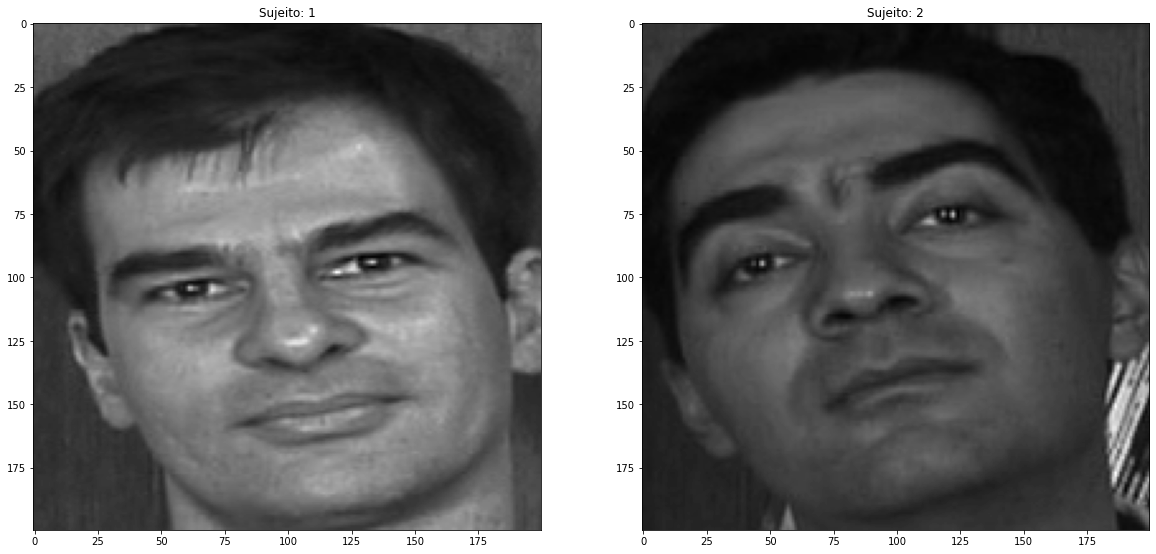

In [14]:
plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.title(f'Sujeito: {str(test_y[1])}')
plt.imshow(test_x[1], cmap = 'gray')

plt.subplot(122)
plt.title(f'Sujeito: {str(test_y[5])}')
plt.imshow(test_x[5], cmap = 'gray')

Face 0 identified


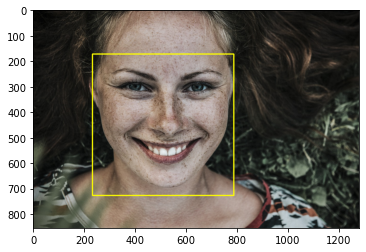

In [26]:
image_bgr = cv2.imread(r"G:\Meu Drive\My Repositories\Datasets_for_data_science\facial_recognizer\datas\geral\\px-woman-smilings.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_draw = image_rgb.copy()

#plt.imshow(image_rgb)

# Classificadores que serão utilizados no reconhecimento facila 

classifier_dlib_68_path = r"G:\Meu Drive\My Repositories\Datasets_for_data_science\facial_recognizer\dlib\\shape_predictor_68_face_landmarks.dat"
classifier_dlib = dlib.shape_predictor(classifier_dlib_68_path)
face_detector = dlib.get_frontal_face_detector()

# Gerando uma função para definir os marcos faciais em uma determinada foto 

def face_rectangle(image):
    rectangles = face_detector(image, 1)

    if len(rectangles) == 0:
        return None
    
    for k, d in enumerate(rectangles):
        print(f'Face {str(k)} identified')
        cv2.rectangle(image, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 4)

    return image

def face_marks():
    pass

image_draw = face_rectangle(image_draw)

plt.imshow(image_draw)